<h1 align="center">Mushrooms</h1>

<html>
<h1  align="center"> 
    <hr>
    <img align="center;" style="background-color:
#253bff"; color:"#ff5d25";" src="https://c.tenor.com/RpShjXCcGiEAAAAC/trippy-mushroom.gif"; width="30%"; height="20%">

</h1>
</html>

<h1 align="center">Índice del análisis</h1>

- [**Librerias**](#Librerias)
- [**Modelos**](#Modelos)
- [**Conclusiones**](#Conclusiones)

<html><h1 align="center", style="background: #e84179; color:white">Librerias</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [1]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def colored(r, g, b, text):
        return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)
    
def get_metrics(y_test, y_pred, model):
    accuracy = accuracy_score(y_test, y_pred).round(3)
    recall   = recall_score(y_test, y_pred).round(3)
    precision= precision_score(y_test, y_pred).round(3)
    f_1      = f1_score(y_test, y_pred).round(3)
    metrics  = f"\n\nAccuracy:  {accuracy}\nRecall:    {recall}\nPrecision: {precision}\nf1 Score:  {f_1}."
    return print(colored(0, 75, 43, 'Modelo: ' + model), colored(238, 75, 43, metrics))

[**Volver al Inicio**](#Índice-del-análisis) 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
data_mush = 'secondary_data.csv'
data_hongo = pd.read_csv(data_mush, sep=';')

In [4]:
data_hongo.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [5]:
data_hongo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
data_hongo['has-ring'].value_counts()

f    45890
t    15179
Name: has-ring, dtype: int64

In [7]:
data_hongo['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [8]:
#no tiene anillo = f = 0
#tiene anillo = t = 1
data_hongo['has-ring'] = data_hongo['has-ring'].replace('f',0)
data_hongo['has-ring'] = data_hongo['has-ring'].replace('t',1)
data_hongo['has-ring'].value_counts()

0    45890
1    15179
Name: has-ring, dtype: int64

In [9]:
X = data_hongo[['cap-diameter', 'cap-shape', 'cap-color', 'stem-color', 'stem-width', 'stem-height','gill-color', 'habitat', 'season','has-ring']]  
y = data_hongo['class']

In [10]:
#poisonous = p = 1
#edible = e = 0

y = y.replace('p',1)
y = y.replace('e', 0)
y.value_counts()

1    33888
0    27181
Name: class, dtype: int64

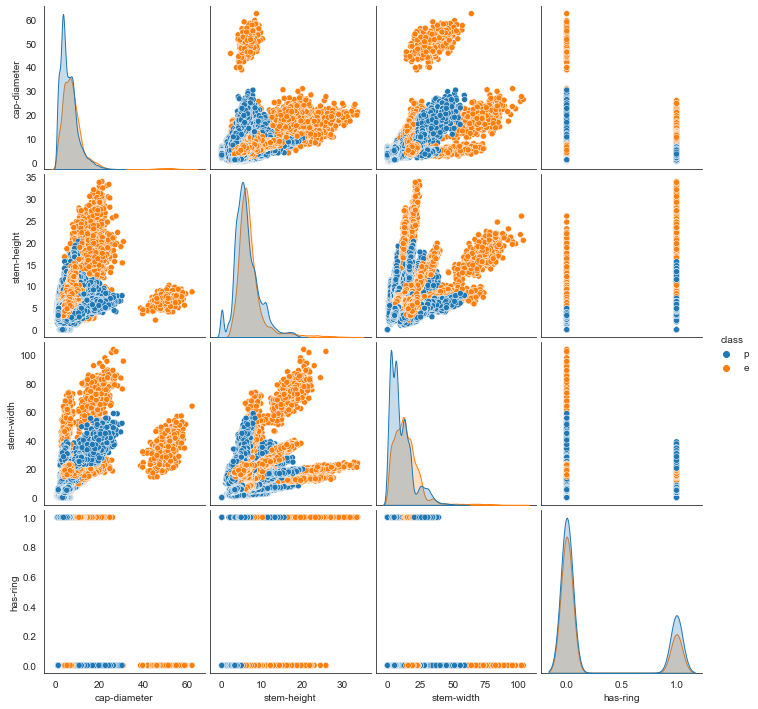

In [285]:
sns.pairplot(data_hongo, hue='class')

In [11]:
dummies_cap_shape = pd.get_dummies(X['cap-shape'], drop_first=True, prefix='cap-shape')
dummies_cap_color = pd.get_dummies(X['cap-color'], drop_first=True, prefix='cap-color')
dummies_stem_color = pd.get_dummies(X['stem-color'], drop_first=True, prefix='stem-color')
dummies_gill_color = pd.get_dummies(X['gill-color'], drop_first=True, prefix='gill-color')
dummies_habitat = pd.get_dummies(X['habitat'], drop_first=True, prefix='habitat')
dummies_season = pd.get_dummies(X['season'], drop_first=True, prefix='season')

X = X.drop(['cap-shape', 'cap-color', 'stem-color', 'gill-color', 'habitat', 'season'], axis=1)

In [12]:
X = pd.concat([X, dummies_cap_shape, dummies_cap_color, dummies_stem_color, dummies_gill_color, dummies_habitat, dummies_season], axis = 1)

In [13]:
print(X.shape)

(61069, 54)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

In [15]:
# Utilizamos sklearn para estandarizar la matriz de Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Sklearn_pandas para escalar y conservar el formato pandas

columns_to_train = ["cap-diameter", "stem-height", "stem-width"]
mapper = DataFrameMapper([(columns_to_train, StandardScaler())])

scaled_features = mapper.fit_transform(X_train.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=X_train.index, columns=columns_to_train)

display(X_train)
X_train_skp = X_train.drop(["cap-diameter", "stem-height", "stem-width"], axis=1)
X_train_scaled_skp = pd.concat([X_train_skp, scaled_features_df], axis = 1)

scaled_features = mapper.fit_transform(X_test.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=X_test.index, columns=columns_to_train)

X_test_skp = X_test.drop(["cap-diameter", "stem-height", "stem-width"], axis=1)
X_test_scaled_skp = pd.concat([X_test_skp, scaled_features_df], axis = 1)

cap-diameter  stem-width  stem-height  has-ring  cap-shape_c  \
52183          6.39       22.70        10.02         0            0   
21746          7.33       15.55         5.96         0            0   
3911           3.84        3.40         5.36         1            0   
47505          2.54        2.35         8.18         0            0   
22734          6.18       15.57         4.81         0            0   
...             ...         ...          ...       ...          ...   
36277          5.12        5.21         4.71         1            0   
48310          5.93        6.62         6.10         1            0   
57727          3.66        0.00         0.00         1            0   
35212          4.20        8.95         8.22         1            0   
529            6.43       13.03         6.84         1            0   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
52183            0            0            0            0            1  ...   
21746            0            0            0            1            0  ...   
3911             0            0            0            0            1  ...   
47505            0            0            0            0            0  ...   
22734            1            0            0            0            0  ...   
...            ...          ...          ...          ...          ...  ...   
36277            0            0            0            0            1  ...   
48310            0            0            0            0            1  ...   
57727            0            1            0            0            0  ...   
35212            0            0            0            0            1  ...   
529              0            0            0            0            1  ...   

       habitat_g  habitat_h  habitat_l  habitat_m  habitat_p  habitat_u  \
52183          0          0          0          0          0          0   
21746          0          0          0          0          0          0   
3911           1          0          0          0          0          0   
47505          1          0          0          0          0          0   
22734          0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
36277          0          0          0          0          0          0   
48310          1          0          0          0          0          0   
57727          0          0          0          0          0          0   
35212          0          0          0          0          0          0   
529            0          0          0          0          0          0   

       habitat_w  season_s  season_u  season_w  
52183          0         0         0         0  
21746          0         0         0         1  
3911           0         0         0         0  
47505          0         0         0         0  
22734          0         0         0         0  
...          ...       ...       ...       ...  
36277          0         0         0         1  
48310          0         0         1         0  
57727          0         0         0         0  
35212          0         1         0         0  
529            0         0         1         0  

[45801 rows x 54 columns]

In [17]:
X_test_scaled

array([[ 1.29858636,  0.49614021,  0.82619397, ..., -0.21585397,
        -0.77454706, -0.3054691 ],
       [ 0.44884642,  0.54022257,  0.20549826, ..., -0.21585397,
         1.29107713, -0.3054691 ],
       [-0.17757657, -0.04186495,  0.12153942, ..., -0.21585397,
         1.29107713, -0.3054691 ],
       ...,
       [-0.08673578,  0.07936154, -0.57112101, ..., -0.21585397,
        -0.77454706, -0.3054691 ],
       [ 0.22552946,  0.07936154,  0.79620867, ..., -0.21585397,
        -0.77454706, -0.3054691 ],
       [-0.14918882, -0.54680833, -0.15432534, ..., -0.21585397,
         1.29107713, -0.3054691 ]])

<html><h1 align="center", style="background: #e84179; color:white">Modelos</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

# Logistic Regression

In [18]:
logistic_regression = LogisticRegression(solver="sag")

In [19]:
clf = LogisticRegression(solver="sag")

In [20]:
clf.fit(X_train_scaled_skp, y_train)

LogisticRegression(solver='sag')

In [21]:
# Ajustamos el modelo
logistic_regression.fit(X_train_scaled_skp, y_train)

LogisticRegression(solver='sag')

In [22]:
y_pred = clf.predict(X_test_scaled_skp)

In [23]:
y_train_pred = logistic_regression.predict(X_train_scaled_skp)
y_test_pred = logistic_regression.predict((X_test_scaled_skp)) 
# Notar que debemos escalar los datos de testeo antes de realizar predicciones

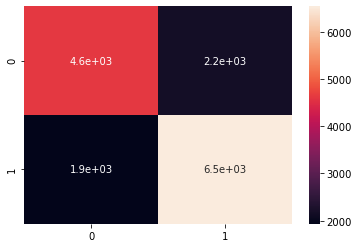

In [24]:
# Elaboramos la matriz de confusión

confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True);

In [25]:
get_metrics(y_test, y_test_pred, 'Logistic Regression')

Modelo: Logistic Regression  

Accuracy:  0.731
Recall:    0.772
Precision: 0.75
f1 Score:  0.761. 


In [27]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


print(f"El valor de True Positives es {TP}")
print(f"El valor de True Negatives es {TN}")
print(f"El valor de False Positives es {FP}")
print(f"El valor de False Negatives es {FN}")      

El valor de True Positives es 6538
El valor de True Negatives es 4619
El valor de False Positives es 2177
El valor de False Negatives es 1934


In [30]:
Specificity = round((TN/(TN+FP)), 3)
print(f"El score de Specificity es {Specificity}")

El score de Specificity es 0.68


In [32]:
y_test_pred_series = pd.Series(y_test_pred)
print(y_test_pred_series.unique())
print(y_test_pred_series.value_counts())

[0 1]
1    8715
0    6553
dtype: int64


In [33]:
y_pred_proba = clf.predict_proba(X_test_scaled_skp)
display(y_pred_proba.shape, y_pred_proba)

(15268, 2)

array([[0.66760771, 0.33239229],
       [0.320146  , 0.679854  ],
       [0.36677862, 0.63322138],
       ...,
       [0.98896077, 0.01103923],
       [0.44231306, 0.55768694],
       [0.07648636, 0.92351364]])

In [34]:
#Con el valor del threshold 

pd.Series(y_pred_proba[:,1]>=0.5).astype(int).value_counts()

1    8715
0    6553
dtype: int64

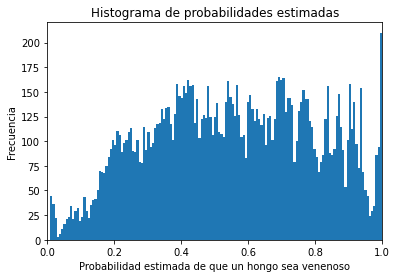

In [35]:

# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=150)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que un hongo sea venenoso')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

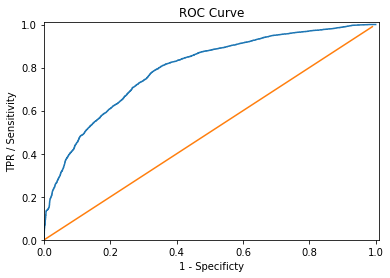

In [37]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [38]:

print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.7937536056870647


# Naive Bayes

In [39]:
gnb = GaussianNB()

gnb.fit(X_train_scaled_skp, y_train)

y_pred_NB = gnb.predict(X_test_scaled_skp)

GaussianNB()

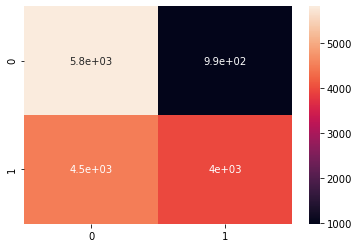

In [45]:
# Elaboramos la matriz de confusión
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_NB)
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True);

In [46]:
get_metrics(y_test, y_pred_NB, 'Naive Bayes')

Modelo: Naive Bayes  

Accuracy:  0.64
Recall:    0.468
Precision: 0.8
f1 Score:  0.591. 


In [47]:
confusion = confusion_matrix(y_test, y_pred_NB)

TP_NB = confusion[1, 1]
TN_NB = confusion[0, 0]
FP_NB = confusion[0, 1]
FN_NB = confusion[1, 0]

print(f"El valor de True Positives es {TP_NB}")
print(f"El valor de True Negatives es {TN_NB}")
print(f"El valor de False Positives es {FP_NB}")
print(f"El valor de False Negatives es {FN_NB}")     

El valor de True Positives es 3965
El valor de True Negatives es 5804
El valor de False Positives es 992
El valor de False Negatives es 4507


In [50]:
#Es la proporción de negativos correctamente predichos sobre el total de predicciones negativas.

Specificity = round((TN_NB/(TN_NB+FP_NB)), 3)

print(f"El score de Specificity es {Specificity}")

El score de Specificity es 0.854


In [51]:
y_pred_proba_NB = gnb.predict_proba(X_test_scaled_skp)
display(y_pred_proba_NB.shape, y_pred_proba_NB)

(15268, 2)

array([[0.9976617 , 0.0023383 ],
       [0.9426489 , 0.0573511 ],
       [0.86576034, 0.13423966],
       ...,
       [1.        , 0.        ],
       [0.99333938, 0.00666062],
       [0.83723409, 0.16276591]])

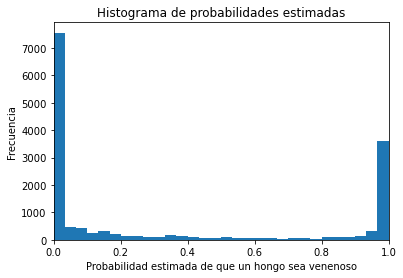

In [52]:
#import matplotlib.pyplot as plt

# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left_NB = y_pred_proba_NB[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left_NB, bins=30)
plt.xlim(0,1)
plt.title('Histograma de probabilidades estimadas')
plt.xlabel('Probabilidad estimada de que un hongo sea venenoso')
plt.ylabel('Frecuencia')
plt.show()

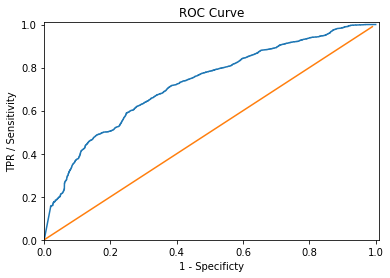

In [53]:
#from sklearn.metrics import roc_curve
fpr_log_NB,tpr_log_NB,thr_log_NB = roc_curve(y_test, y_pred_proba_NB[:,1])

df = pd.DataFrame(dict(fpr=fpr_log_NB, tpr=tpr_log_NB, thr = thr_log_NB))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [54]:
print('AUC=', auc(fpr_log_NB, tpr_log_NB))

AUC= 0.7247083457691326


# CART

In [55]:
dtc_g = tree.DecisionTreeClassifier(criterion='gini')
dtc_g = dtc_g.fit(X_train_skp, y_train)

In [56]:
dtc_e = tree.DecisionTreeClassifier(criterion='entropy')
dtc_e = dtc_e.fit(X_train_skp, y_train)

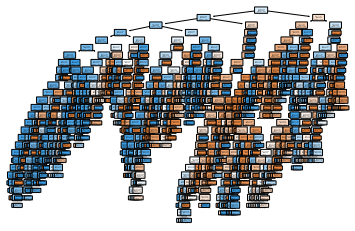

In [57]:
tree.plot_tree(dtc_g,filled=True,rounded=True)
print()

In [60]:
y_pred_dtc_g = dtc_g.predict(X_test_skp)
y_pred_dtc_e = dtc_e.predict(X_test_skp)
print(f"El valor de Accuracy (Gini) es    {round(accuracy_score(y_test, y_pred_dtc_g), 3)}")
print(f"El valor de Accuracy (Entropy) es {round(accuracy_score(y_test, y_pred_dtc_e), 3)}")

El valor de Accuracy (Gini) es    0.917
El valor de Accuracy (Entropy) es 0.917


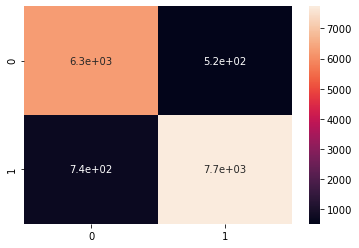

In [61]:
# Elaboramos la matriz de confusión
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dtc_g)
sns.heatmap(confusion_matrix(y_test, y_pred_dtc_g), annot=True);

In [62]:
get_metrics(y_test, y_pred_dtc_g, 'Decision Tree')

Modelo: Decision Tree  

Accuracy:  0.917
Recall:    0.913
Precision: 0.937
f1 Score:  0.925. 


In [63]:
confusion = confusion_matrix(y_test, y_pred_dtc_g)

TP_DTC = confusion[1, 1]
TN_DTC = confusion[0, 0]
FP_DTC = confusion[0, 1]
FN_DTC = confusion[1, 0]

print(f"El valor de True Positives es {TP_DTC}")
print(f"El valor de True Negatives es {TN_DTC}")
print(f"El valor de False Positives es {FP_DTC}")
print(f"El valor de False Negatives es {FN_DTC}")  

El valor de True Positives es 7734
El valor de True Negatives es 6272
El valor de False Positives es 524
El valor de False Negatives es 738


In [65]:
Specificity = round((TN_DTC/(TN_DTC+FP_DTC)), 3)
print(f"El score de Specificity es {Specificity}")

El score de Specificity es 0.923


## Importancia Featured

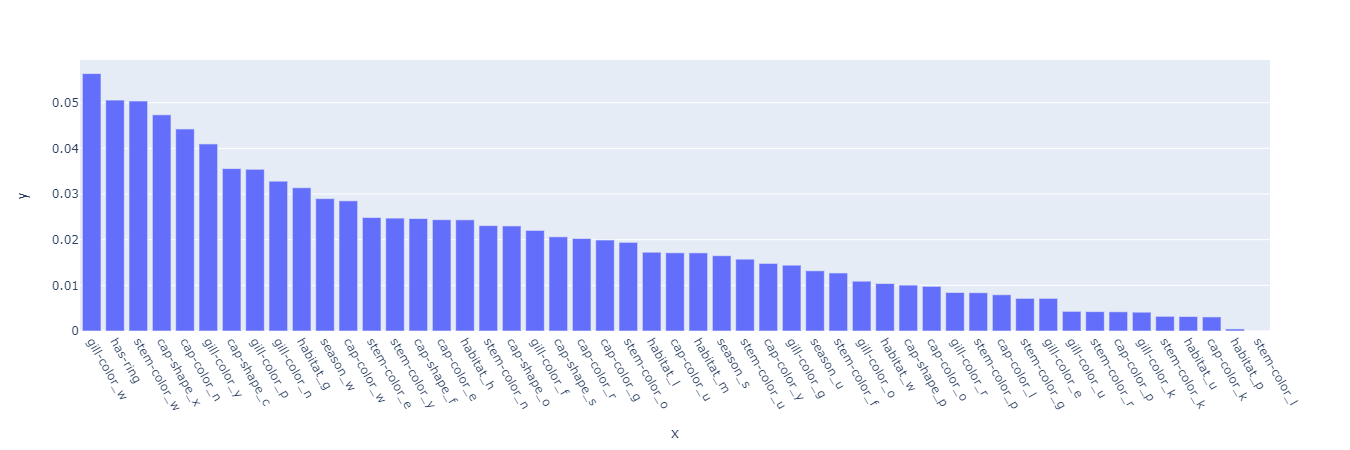

In [67]:
import plotly.express as px

dicc = dict(zip(X_train_skp.columns, dtc_g.feature_importances_))

keys = pd.Series(dicc.keys())
values = pd.Series(dicc.values())

fig = px.bar(x=list(keys.values), y=values.values).update_xaxes(categoryorder="total descending")
fig.update_xaxes(tickangle=60)
fig.show()

# KNN

In [68]:
data_mush = 'secondary_data.csv'
data_hongo = pd.read_csv(data_mush, sep=';')

data_hongo['has-ring'] = data_hongo['has-ring'].replace('f',0)
data_hongo['has-ring'] = data_hongo['has-ring'].replace('t',1)
data_hongo['has-ring'].value_counts()


lista = data_hongo.isnull().sum()
values = []
for i in range(len(lista)):
    if data_hongo.isnull().sum()[i] > 0:
        value = data_hongo.isnull().sum().index[i]
        values.append(value)
data_hongo.drop(columns = values, inplace = True)

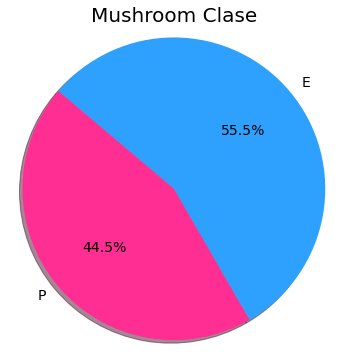

In [69]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6))
mush_size = data_hongo['class'].value_counts().values.tolist()
mush_types = data_hongo['class'].value_counts().axes[0].tolist()
mush_labels = 'E', 'P'
colors = ['#2ea1ff', '#ff2e93']
plt.title('Mushroom Clase', fontsize=20)
patches, texts, autotexts = plt.pie(mush_size, labels = mush_labels, colors = colors, autopct='%2.1f%%',  startangle=300, textprops={'fontsize': 14}, shadow = True)
plt.axis('equal') 
plt.show()

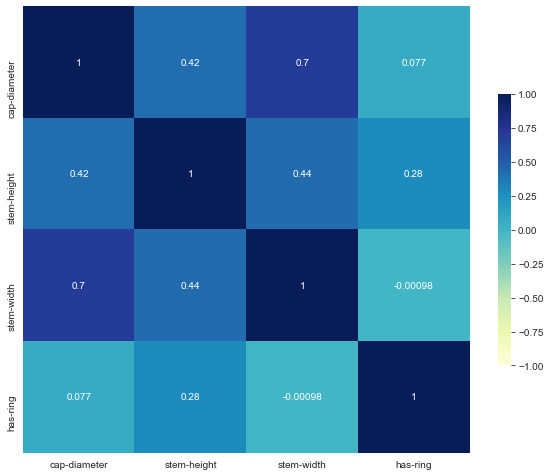

In [70]:
sns.set_style("white")
corr = data_hongo[data_hongo.columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,  cmap="YlGnBu", annot=True, vmax=1,vmin = -1,center=0, square=True, cbar_kws={"shrink": 0.5});

In [72]:
fig = px.scatter_3d(data_hongo, 
                    title = "3D Plot",
                    x = 'cap-diameter', 
                    y = 'stem-height', 
                    z = 'cap-shape', 
                    color = data_hongo['class'].astype('str'))
fig.update_layout(
                  width=600,
                  height=500)
fig.show()

In [73]:
data_hongo = pd.get_dummies(data_hongo, drop_first=True)
data_hongo.rename(columns={'class_p': 'class'}, inplace = True)

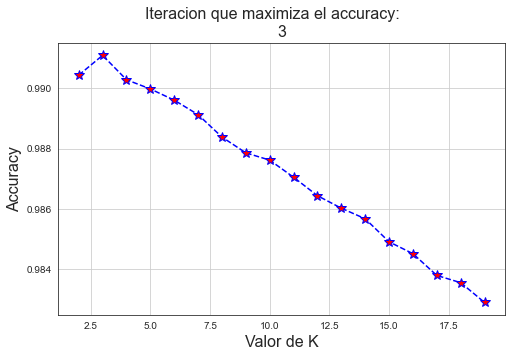

In [74]:
X = data_hongo.drop(columns=['class'])
y = data_hongo['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


kf = KFold(n_splits = 5, shuffle = True, random_state = 12)

k_range = list(range(2,20))
scores = []
try:
    count = 1
    for i in k_range:
        count += 1
        knn = KNeighborsClassifier(n_neighbors = i)
        cv_scores = cross_val_score(knn, X_train, y_train, cv = kf)
        scores.append(np.mean(cv_scores))
        print(colored(238, 75, 43, f'Restan: {str(k_range[-1] - count)} Iteraciones'), end="\r")
except Exception as e:
    print(e)
    print(colored(238, 75, 43, '\nPide otra version de numpy para este algoritmo'))


plt.figure(figsize = (8,5))
plt.plot(k_range, scores, color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel('Valor de K', fontsize=16); plt.ylabel('Accuracy', fontsize=16)
plt.title(k_range[np.argmax(scores)], fontsize=16)
plt.suptitle('Iteracion que maximiza el accuracy: ', fontsize=16)
plt.grid(); plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=k_range[np.argmax(scores)])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
get_metrics(y_test, knn.predict(X_test), 'Knn')

Modelo: Knn  

Accuracy:  0.991
Recall:    0.994
Precision: 0.99
f1 Score:  0.992. 


<html><h1 align="center", style="background: #e84179; color:white">Conclusiones</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

Los modelos arrojan los siguientes resultados: 

|Modelo||Accuracy|Precision|Recall|F1 Score|
|-|-|-|-|-|-|
|Regresión Logística ||73|75|77|76 |
|Naive Bayes ||64|80|47| 59|
|Decision Tree ||92|94|91|92 |
|Knn ||99|99|99|99 |

El modelo que mejor ajusta y clasifica es el de vecinos mas cercanos.